# Анализ и приоритизация гипотез

Проект для рупного интернет-магазина. Вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

## Предподготовка данных

In [45]:
# выгрузим необходимые библиотеки
import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime as dt
from matplotlib import pyplot as plt
pd.set_option("max_colwidth", 70)


import warnings
warnings.filterwarnings('ignore')

In [46]:
# выгружаем таблицу с денными по гипотезам и изучаем данные при помощи функции info()
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
display(hypothesis.head(10))
hypothesis.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привле...",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки ...",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, что...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользов...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увелич...",3,2,2,3
6,Показать на главной странице баннеры с актуальными акциями и распр...,5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать ба...",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Таблица маленькая, видно, что с ней все в порядке.

In [47]:
# выгружаем таблицу с денными по А/В тестам и изучаем данные при помощи функции info()
orders = pd.read_csv('/datasets/orders.csv', sep=',')
display(orders.head(10))
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [48]:
# проверим на наличие дубликатов
print('Количество явных дубликатов', orders.duplicated().sum())

Количество явных дубликатов 0


In [49]:
# выгружаем вторую таблицу с денными по А/В тестам и изучаем данные при помощи функции info()
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
display(visitors.head(10))
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [50]:
print('Количество явных дубликатов', visitors.duplicated().sum())

Количество явных дубликатов 0


### Вывод
С данными все в порядке - нет пропусков и дубликатов. 

## Приоритизация гипотез

In [51]:
# посмотрим на таблицу с названиями гипотез
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привле...",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки ...",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, что...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользов...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увелич...",3,2,2,3
6,Показать на главной странице баннеры с актуальными акциями и распр...,5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать ба...",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


###  Фреймворк ICE для приоритизации гипотез

In [52]:
# применим фреймворк ICE для приоритизации гипотез
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
print(hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round())

                                                              Hypothesis   ICE
8                Запустить акцию, дающую скидку на товар в день рождения  16.0
0  Добавить два новых канала привлечения трафика, что позволит привле...  13.0
7  Добавить форму подписки на все основные страницы, чтобы собрать ба...  11.0
6  Показать на главной странице баннеры с актуальными акциями и распр...   8.0
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, что...   7.0
1  Запустить собственную службу доставки, что сократит срок доставки ...   2.0
5  Добавить страницу отзывов клиентов о магазине, что позволит увелич...   1.0
3  Изменить структура категорий, что увеличит конверсию, т.к. пользов...   1.0
4  Изменить цвет фона главной страницы, чтобы увеличить вовлеченность...   1.0


По итогам оценки приоритизации гипотез по методу ICE можно выделить следующие гипотезы:
- Запустить акцию, дающую скидку на товар
- Добавить два новых канала привлечения трафика
- Добавить форму подписки на все основные страницы

###  Фреймворк RICE для приоритизации гипотез

In [9]:
# применим фреймворк RICE для приоритизации гипотез
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis[
    'Efforts'
]
print(hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                          Hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


По итогам оценки приоритизации гипотез по методу RICE можно выделить следующие гипотезы:
- Добавить форму подписки на все основные страницы
- Добавить блоки рекомендаций товаров на сайт
-  Добавить два новых канала привлечения трафика

### Вывод
По итогам анализа приоритизации гипотез двумя методам (ICE и RICE) видно, что самыми приоритетными является следующие гипотезы.
По ICE: 
- Запустить акцию, дающую скидку на товар (8)
- Добавить два новых канала привлечения трафика (0)
- Добавить форму подписки на все основные страницы (7)

По RICE:
- Добавить форму подписки на все основные страницы (7)
- Добавить блоки рекомендаций товаров на сайт (2)
- Добавить два новых канала привлечения трафика (0)

Видно, что два теста дали разные результаты. В тесте ICE в топ-3 не попала гипотеза 2, а то время как в тесте RICE она заняла второе место. В топ-3 присутствует гипотеза 0 и 7. Гипотеза 8 занята первое мето по тесту ICE, но не попала в топ-3 по тесту RICE. Это могло произвойти, так как тест RICE учитывает еще один параметр - охват(Reach), то есть скольких пользователей затронет изменение, которое мы хотим внести. Таким образом, стоит приоритизировать гипотезы 7 и 0.

## Анализ A/B-теста 

In [10]:
# посмотри дата фреймы еще раз
display(orders.head(10))
display(visitors.head(10))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


### Подготовка данных orders

In [11]:
# переведемт данные в нужный тип
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)



In [12]:
# проверим
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


,revenue,percent
group,,
A,557,46.5
B,640,53.5


Text(0.5, 1.0, 'Доли А/В в таблице orders')

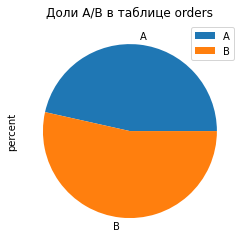

In [13]:
# сделаем свобную таблицу, чтобы посмотретть доли
a_b_total = orders.pivot_table(index='group', values='revenue', aggfunc='count')
a_b_total['percent'] = (a_b_total['revenue'] / a_b_total['revenue'].sum() * 100).round(1)
display(a_b_total)
a_b_total.plot(kind='pie', y='percent')
plt.title('Доли А/В в таблице orders')

In [14]:
# проверим пересечение пользоватлей по группам
dup_users = orders.groupby('visitorId').agg({'group': ['nunique', 'unique']})
dup_users.columns = ['groups', 'group_name']
dup_users = dup_users.query('groups > 1')
display(dup_users)

,groups,group_name
visitorId,,
8300375,2,"[B, A]"
199603092,2,"[A, B]"
232979603,2,"[B, A]"
237748145,2,"[B, A]"
276558944,2,"[B, A]"
351125977,2,"[B, A]"
393266494,2,"[A, B]"
457167155,2,"[B, A]"
471551937,2,"[A, B]"


### Подготовка данных visitors

In [15]:
# переведемт данные в нужный тип
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [16]:
# проверим
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,visitors,percent
group,,
A,31,50.0
B,31,50.0


Text(0.5, 1.0, 'Доли А/В в таблице visitors')

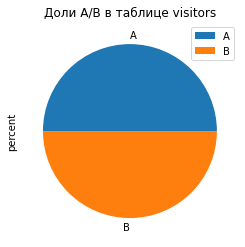

In [17]:
# смотрим доли в сводной таблице
a_b_total = visitors.pivot_table(index='group', values='visitors', aggfunc='count')
a_b_total['percent'] = (a_b_total['visitors'] / a_b_total['visitors'].sum() * 100).round(1)
display(a_b_total)
a_b_total.plot(kind='pie', y='percent')
plt.title('Доли А/В в таблице visitors')

В итоге проверили данные на распределение по группам - доли составляют 46/54 в таблице orders и 50/50 в таблице visitors. 
Проверили типы данных, перевели данные в столбцах date  в datetime.


### Подготовка кумулятивных данных

In [18]:
# готовим данные
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# oбъединим обе таблицы в одну с понятными названиями столбцов
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 


        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


### График выручки по группам

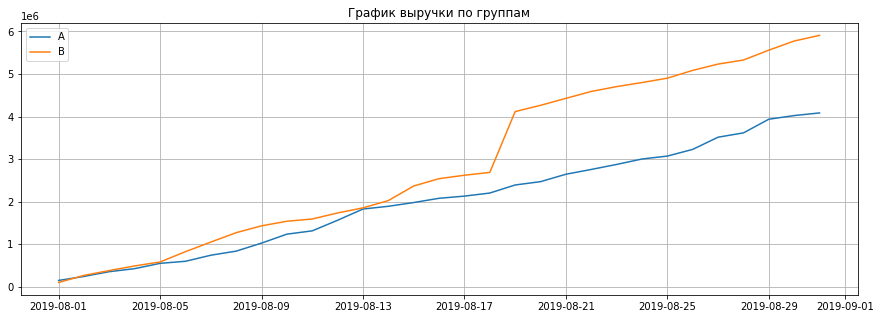

In [19]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize = (15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График выручки по группам')
plt.legend()
plt.grid()

На графике видно, что выручка в группе В сделала скачок 2019-08-19 и продолжила стабильно расти. Возможно, причина скачка - крупная покупка на большую сумму или резконе увеличение количества заказов. 
Выручка в группе А была ниже на протяжении всего исследования, однако тоже росла. 

### График среднего чека по группам

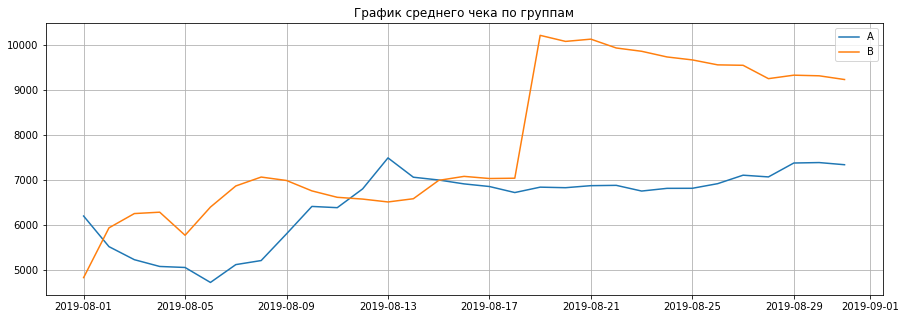

In [20]:
plt.figure(figsize = (15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График среднего чека по группам')
plt.legend()
plt.grid()


В группе В снова наблюдается скачок, который мы видели на графике выручки. Это значит, что средний чек резко увеличиося (скорее всего из-за заказа на большую сумму), но после наблюдается падение кумулятивного среднего чека в группе В.

В группе А наблюдался рост до 2019-08-13, после чего рост замедлился, и средний чек остается примрно на одном и том же уровне.

### График относительного изменения кумулятивного среднего чека группы B к группе A

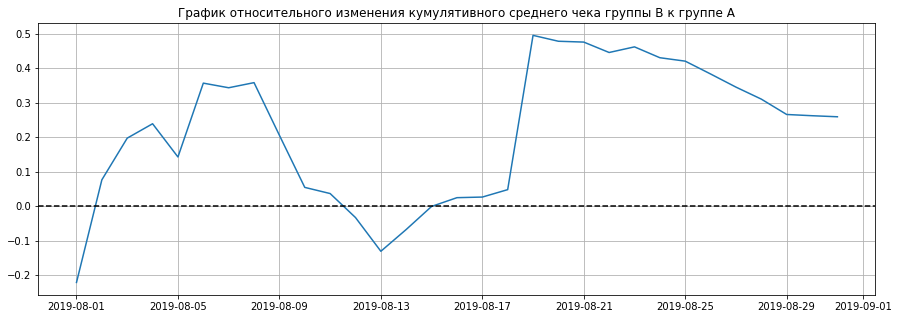

In [21]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize = (15, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.grid()

На графике относительного изменения кумулятивного среднего чека группы B к группе A видны скачки в нескольких местах.
Дело может быть в крупных заказах или выбросах. Тем не менее в конце график стабьльно идет вниз.

### График кумулятивной конверсии по группам

(18109.0, 18139.0, 0.02, 0.04)

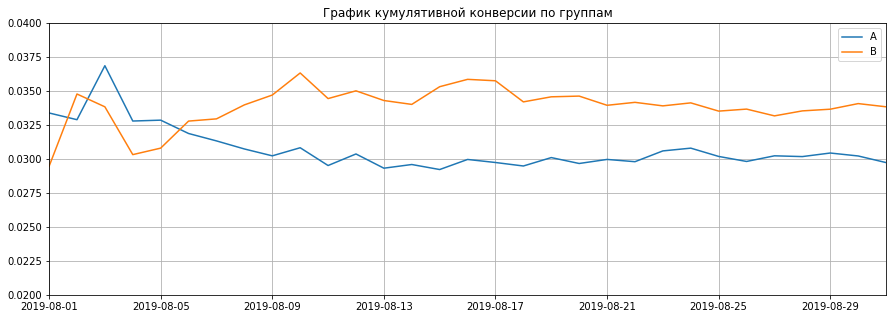

In [22]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize = (15, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.grid()
plt.legend()
plt.title('График кумулятивной конверсии по группам')

from datetime import datetime
plt.axis([datetime.strptime('2019-08-01', '%Y-%m-%d'), datetime.strptime('2019-08-31', '%Y-%m-%d'), 0.020, 0.040])


На графике видны колебания в начале периода, однако после они выровнялись и идут параллельно.


### График относительного изменения кумулятивной конверсии группы B к группе A

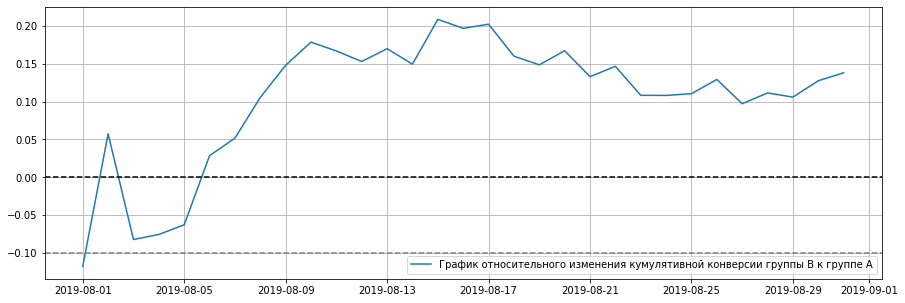

In [23]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize = (15, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="График относительного изменения кумулятивной конверсии группы B к группе A")
plt.grid()
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')


Группа А проигрывала группе В, но вырвалась вперед. Однако, для того, чтобы сделать выводы, нужно проверить данные на выбросы.

### Точечный график количества заказов по пользователям

In [24]:
# подсчитаем количество заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


Из таблицы видим пользователей, которые совершали в два раза больше заказов, чем в среднем по выборке.


Text(0.5, 1.0, 'Гистрограмма распределения количества заказов на одного пользователя')

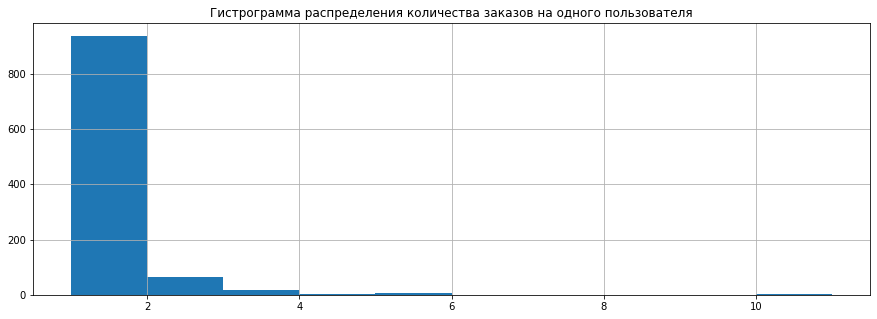

In [25]:
# построим гистрограмму распределения количества заказов на одного пользователя
plt.figure(figsize = (15, 5))
plt.hist(ordersByUsers['orders']) 
plt.grid()
plt.title('Гистрограмма распределения количества заказов на одного пользователя')

Из гистограммы видно, что обычно пользователи совершают 1 заказ или реже 2 заказа.

Text(0.5, 1.0, 'Точечный график числа заказов на одного пользователя')

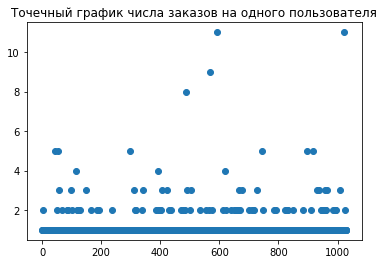

In [26]:
# построим точечный график числа заказов на одного пользователя
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Точечный график числа заказов на одного пользователя')

Из гистограммы видно, что 5 и более заказов стречается довольно редко, а пользователи с более, чем 8 заказами уже похожи на аномалии.

### Подсчет 95-й и 99-й перцентили количества заказов на пользователя

In [27]:
# чтобы проверить, что считать аномалиями, нужно посмотреть на 95 и 99 перцентиль
percentile = np.percentile(ordersByUsers['orders'], [95, 99])
display('95-й и 99-й перцентили количества заказов на пользователя:', percentile)

'95-й и 99-й перцентили количества заказов на пользователя:'

array([2., 4.])

Таким образом, видно, что менее 1% пользователей делают более 4 заказов, и не более 5% - 2 заказа. 
Возьмем эти данные за нижнюю границу и отсеим аномалии по ней.

### Точечный график стоимостей заказов

(array([1.195e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([5.000000e+01, 1.294950e+05, 2.589400e+05, 3.883850e+05,
        5.178300e+05, 6.472750e+05, 7.767200e+05, 9.061650e+05,
        1.035610e+06, 1.165055e+06, 1.294500e+06]),
 <BarContainer object of 10 artists>)

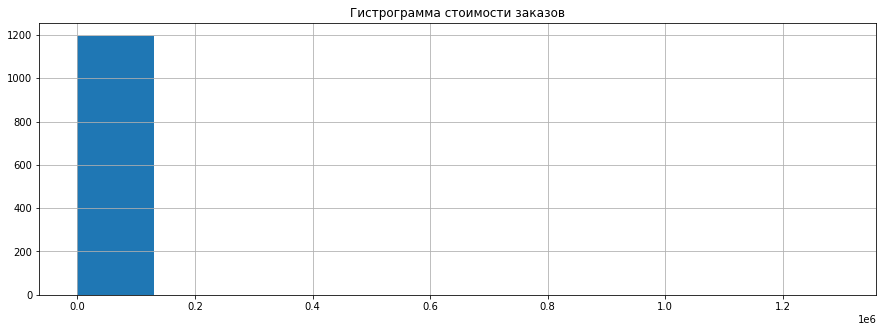

In [28]:
# построим гистрограмму стоимости заказов 
plt.figure(figsize = (15, 5))
plt.grid()
plt.title('Гистрограмма стоимости заказов')
plt.hist(orders['revenue']) 

Гистограмма не очень информативна, но видно, что стоимость заказов о осномном не доходит до 200000.

Text(0.5, 1.0, 'Точечный график стоимости заказов')

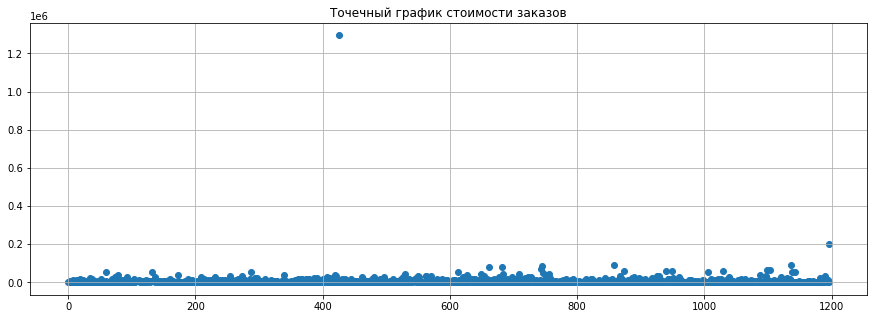

In [29]:
# построим точечный график стоимости заказов
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize = (15, 5))
plt.grid()
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимости заказов')

Из точечной диаграммы видно, что заказы редко превышают 50000 р. 
Также обнаружили заказ на более, чем 1200000, что очень довольно странно. Нужно посмотреть на персентиль перед тем, как принять эти данные за аномалии.

### Подсчет 95-й и 99-й перцентили стоимости заказов

In [30]:
# чтобы проверить, что считать аномалиями, нужно посмотреть на 95 и 99 перцентиль
percentile = np.percentile(orders['revenue'], [95, 99])
display('95-й и 99-й перцентили стоимости заказов:', percentile)

'95-й и 99-й перцентили стоимости заказов:'

array([28000. , 58233.2])

Теперь ясно, что не более 5% заказов стоят более 28000, а заказы дороже 58000 составляют 1%. 
Таким образом, все заказы дороже 28000 будут аномалиями.

### Статистическая значимость различий в конверсии между группами по «сырым» данным

In [31]:
# подготовим данные для анализа 
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5)) 


,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [37]:
# cоздаем переменные  для пользователей, которые заказывали хотя бы 1 раз
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

# объявим переменные, в которых пользователям из разных групп будет соответствовать количество заказов
# тем, кто ничего не заказал, будут соответствовать нули

sampleA = pd.concat(
    [ordersByUsersA['orders'],pd.Series(
        0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat(
    [ordersByUsersB['orders'],pd.Series(
        0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print('alpha =', 0.05)
print("p_value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

alpha = 0.05
p_value = 0.017
0.138


Нулевую гипотезу о том, что конверсия по сырым данным равна, ОТВЕРАГАЕМ, так как p_value меньше alpha.
Анализ сырых данных показывает, что разница между конверсией групп А и В имеет статистическую значимость.
Относительный прирост конверсии - 13,8%

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

In [38]:
# найдём относительные различия в среднем чеке между группами
print('alpha =', 0.05)
print('p_value = {0:.3f}'.format(
    stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

alpha = 0.05
p_value = 0.729
0.259


Нулевая гипотеза Н0 - средний чек между группами равен, Н1 - средний чек различен.
По итогам теста p_value больше alpha, значит НЕ отвергаем нулевую гипотезу - статистически значимой разницы в чеках по сырым данным нет.
Средний чек по группе В немного ниже, чем по группе А.

###  Статистическая значимость различий в конверсии между группами по «очищенным» данным

In [39]:
# примим за наомальных пользователей тех, кто совершил более 2х покупок
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
abnormalUsers = (
    pd.concat([usersWithManyOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))
display(abnormalUsers.shape)

18    199603092
23    237748145
37    249864742
68    457167155
68    611059232
Name: visitorId, dtype: int64

(20,)

В итоге видно, что в данных есть 20 аномальных пользователей.

In [41]:
# подготовим выборки количества заказов по группам теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('alpha =', 0.05)
print('p_value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p_value = 0.012
0.170


При нулевой гипотезе (Н0) о том, что конверсии групп равны p_value меньше, чем alpha, что значит, что ОТВЕРГАЕМ нулевую гипотезу. Разница конверсий по очещенным данным имеет статистичнскую значимость.

Конверсия группы В выше, чем конверсия группы А, но данные практически не изменились,если сравнивать их с тестом по сырым данным.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [44]:
# смотрим заказы дороже 28000
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64
(74,)


Видим 74 заказа дороже 28000.

In [47]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [50]:
print('alpha =', 0.05)
print(
    'p_value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

alpha = 0.05
p_value = 0.738
-0.020


Н0 - средний чек по группам равен, Н1 - средний чек различается.
p_value больше, чем alpha - НЕ отвергаем нулевую гипотезу, то есть разницы нет.
Видно, что p_value увеличилось, но не на много, но разница между сегментами сократилась с 17% до 2%.

## Вывод

В проекте был проведен анализ приоритизиции гипотез с использованием фреймворка ICE и RICE.

По итогам видно,что два теста дали разные результаты. В тесте ICE в топ-3 не попала гипотеза 2, а то время как в тесте RICE она заняла второе место. В топ-3 присутствует гипотеза 0 и 7. Гипотеза 8 занята первое мето по тесту ICE, но не попала в топ-3 по тесту RICE. Это могло произвойти, так как тест RICE учитывает еще один параметр - охват(Reach), то есть скольких пользователей затронет изменение, которое мы хотим внести. Таким образом, стоит приоритизировать гипотезы 7 и 0.

Во второй части проекта был проведен анализ А/В теста, по итогам которого удалось выяснить следущее.

Конверсия:
-  разница между конверсией групп А и В имеет статистическую значимость по сырым данным, относительный прирост конверсии - 13,8%;
- разница конверсий групп А и В имеет имеет статистичнскую значимость по очищенным данным, в сравнении с сырыми данными разница нехначительная.
Итого: есть статистически значимые различия по конверсии между группами  по «сырым» и по данным после фильтрации аномалий.


Средний чек:
- статистически значимой разницы в чеках по сырым данным нет;
- статистически значимой разницы в чеках по очищенным  данным нет, но разница между сегментами сократилась с 17% до 2%.
Итого: нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Конверсия сегрмента В выше сегмента А. Однако ращница в среднем чеке отсутствует.

